# TAREA AULA VIRTUAL 2

## Nájera Quintana José Antonio 
## Rivera González Ernesto Mauricio 

# Funciones

In [ ]:
# En primera instancia importamos todos los paquetes que vamos a utilizar para definir los cinco métodos conocidos y a su vez las funciones
# con las que vamos a trabajar
from pylab import *
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def f1(x):
    return 2*x**2+5*x -3
def df1(x):
    return  lambda x: 4*x+5 #se calcula a mano la derivada

def f2(x):
    return cos(x) + (1+x**2)**(-1)
def df2(x):
    return -sin(x)-2*x*(1+x**2)**(-2)

    
def f3(x):
    return (x-2)**2 - log(x)
def df3(x):
    return 2*(x-2)-1/x


def f4(x):
    return x**3-3*x + 2
def df4(x):
    return 3*x**2-3

def f5(x):
    return np.cbrt(x)



def f6(x):
    return x**2-14*x+50
def df6(x):
    return 2*x-14



def f7(x):
    return x-np.cos(x)
def df7(x):
    return 1+np.sin(x)

    
    
def f8(x):
    return np.cos(x)-x**3
def df8(x):
    return -sin(x)-3*x**2



def f9(x):
    return np.tan(np.pi*x) -6
def df9(x):
    return np.pi * 1/(np.cos(np.pi*x))**2



def f10(x):
    return ((x-0.3)**2+0.01)**(-1)-((x-0.8)**2+0.04)**(-1)
def df10(x):
    return (3*x**2-6.72*x**3+5.568*x**2-2.0184*x+0.26144)*((x**2-0.6*x+0.1)**2(x**2-1.6*x+0.68)**2)**(-1)



def f11(x):
     return x**4-6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
def df11(x):
      return 4*x**3-19.2*x^2+20.538
    

    

# Tiempo de cómputo

In [ ]:
# Ahora para poder generar una discusión del desempeño de los métodos podemos definir al tiempo de cómputo y así analizar que tan eficiente 
# es cada método a comparación de los otros 
from time import time 
# El tiempo inicial antes de que cada método numérico para calcular las raíces se desempeñe es 
ti = time()
#ridder(f1,-1,-1,1e-5)
tfi = time()-ti
#print (ridder(f1,-1,-1,1e-5),tf,'seg')

#para cada método y función se calculará el tiempo que tarda en calcularse la raíz y además del error porcentual se usará el tiempo para decidir el mejor y peor método. 

<font size = 5 color = 'light blue'> Método Incremental 

In [ ]:
def incremental(f,a,b,dx):
    x0=a;f0=f(x0)
    x1=x0+dx;f1=f(x1)
    contador=0.0
    while f0*f1>0.0:
        if x1>=b: return ('nada') #salgo del bucle infinito
        x0=x1;f0=f1
        x1=x0+dx;f1=f(x1)
        contador=contador+1
    return [x1,contador] 

<font size = 5 color = 'light blue'> Método de bisección 

In [ ]:
def biseccion(f,a,b,epsilon):
    contador=0
    dx=abs(b-a)
    while dx>epsilon:
        x=(a+b)/2.0
        if (f(a)*f(x))<0:
            b=x #izquierda
        else:
            a=x #derecho
        dx=abs(b-a) #renombrar intervalo
        contador=contador+1
    return [x, contador]

<font size = 5 color = 'light blue'> Método de Newton Raphson

In [ ]:
def newton(f,df,x,epsilon=1e-6):
    dx=2*epsilon
    contador = 0
    while dx> epsilon and contador<1000:
        x1=x-(f(x))/(df(x))
        dx=abs(x-x1)
        x=x1
        contador=contador+1
    return [x,contador]


<font size = 5 color = 'light blue'> Método de la secante 

In [ ]:
def secante(f, x0, x1, delta=1e-9):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan], #nan es el paso inicial del Data Frame
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0) #secante
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

<font size = 5 color = 'light blue'> Método de Ridders

In [ ]:
# Código de la profesora Roxana y Jordi
from math import *
def ridders(f,x1,x2,tol=1e-9):
    n=0
    f1=f(x1)
    if f1==0: return x1
    f2=f(x2)
    if f2==0: return x2
   # if f1*f2>0.0: return np.nan #intervalos correctos
    while abs(x1-x2)> tol:
        x3=0.5*(x1+x2);f3=f(x3)
        raiz=sqrt(f3**2.-f1*f2)
        if raiz==0:return None
        fraccion=(x3-x1)*f3/raiz
        if (f1-f2)<0.0: fraccion=-fraccion
        x4=x3+fraccion; f4=f(x4)
        if (f3*f4)>0.0:
            if f1*f4>0.0:x1=x3;f1=f3
            else: x2=x3;f2=f3
        else:             
            x1=x3;x2=x4;f1=f3;f2=f4
        n+=1
    return x4,n

In [ ]:
# En todos los casos se obtendrán las raíces con Mathematica para poder comparar los resultados con el obtenido en Mathematica

<font size=4 color='green'> Se comienza por la primera función, que es $2x^2+5x-3=0$. Se realiza la gráfica para poder visualizar puntos cercanos a las raíces. Para este caso además mathematica da las raíces $x=\dfrac{1}{2}$ y $x=-3$.

In [201]:
xx = linspace(-10,10,1000) 
rcParams[ 'figure.figsize' ]=(10,5)

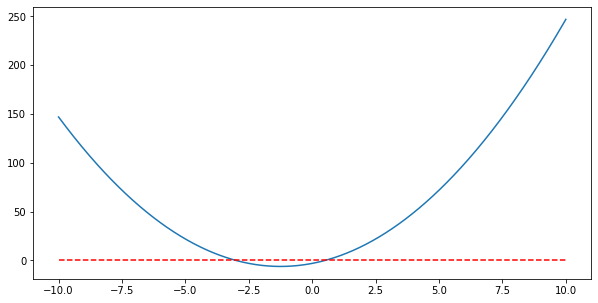

In [202]:
# Graficamos en primera instancia el polinomio dado como la función 1
plot(xx, f1(xx))
plot(xx, zeros(len(xx)), '--r')

<font size=4 color='green'> Se comienza primero con el método incremental

In [ ]:
print(incremental(f1,0,1,1e-7))#una raíz está entre 0 y 1, por la imagen
print(incremental(f1,-3.5,-2.5,1e-7)) #la otra está entre -3.5 y -2.5 

[0.5000000000133479, 4999999.0]
[-2.9999999008182896, 5000000.0]


<font size = 4 color='green'> Se emplean pandas para analizar el error para esta función con pasos hasta de 1e-7 y con esto ver cuál es el mejor método.

In [ ]:
import pandas as pd
from time import time

lista_incremental = []
idx = []
valor_real=0.5
t = []
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f1,0,1,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.500000,4.0,0.000000e+00,0.000011
1.000000e-02,0.500000,49.0,4.440892e-14,0.000019
1.000000e-03,0.500000,499.0,6.661338e-14,0.000168
1.000000e-04,0.500100,5000.0,2.000000e-02,0.001721
1.000000e-05,0.500000,49999.0,7.185363e-11,0.018999
1.000000e-06,0.500001,500000.0,1.999987e-04,0.178852
1.000000e-07,0.500000,4999999.0,2.669576e-09,1.720589


In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=-3
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f1,-3.5,-2.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-3.000,4.0,1.480297e-14,0.000013
1.000000e-02,-2.990,50.0,3.333333e-01,0.000033
1.000000e-03,-2.999,500.0,3.333333e-02,0.000304
1.000000e-04,-3.000,4999.0,3.517187e-11,0.003598
1.000000e-05,-3.000,49999.0,1.091867e-10,0.017275
1.000000e-06,-3.000,499999.0,2.329633e-09,0.181993
1.000000e-07,-3.000,5000000.0,3.306057e-06,1.715081


<font size = 4 color='green'> El error porcentual en este método es 2.6695e-9 y 3.3060e-6. Se ve ahora el método de bisección.

In [ ]:
print(biseccion(f1,0,1,1e-4))
print(biseccion(f1,-3.5,-2.5,1e-4))

[0.99993896484375, 14]
[-2.50006103515625, 14]


In [ ]:
l_biseccion = []
idx = []
valor_real=0.5
t = []
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f1,0,1,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.937500,4,87.500000,0.000013
1.000000e-02,0.992188,7,98.437500,0.000006
1.000000e-03,0.999023,10,99.804688,0.000007
1.000000e-04,0.999939,14,99.987793,0.000010
1.000000e-05,0.999992,17,99.998474,0.000012
1.000000e-06,0.999999,20,99.999809,0.000013
1.000000e-07,1.000000,24,99.999988,0.000015


In [ ]:
l_biseccion = []
idx = []
t = []
valor_real=-3 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f1,-3.5,-2.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-2.562500,4,14.583333,0.000012
1.000000e-02,-2.507812,7,16.406250,0.000005
1.000000e-03,-2.500977,10,16.634115,0.000007
1.000000e-04,-2.500061,14,16.664632,0.000010
1.000000e-05,-2.500008,17,16.666412,0.000011
1.000000e-06,-2.500001,20,16.666635,0.000013
1.000000e-07,-2.500000,24,16.666665,0.000015


<font size = 4 color = 'green'> Se continua con el método de Newton-Raphson

In [203]:
df1 = lambda x: 4*x+5 #se calcula a mano la derivada
print(newton(f1,df1,0.6,1e-9)) #la primer raíz por la imagen está cerca de 0.6
print(newton(f1,df1,-2.8,1e-9)) #y la segunda cerca de -2.8

[0.5, 4]
[-3.0, 4]


In [204]:
l_Newton = []
idx = []
t = []
valor_real=0.5 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f1,df1,0.6,epsilon= tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.502703,1,5.405405e-01,0.000022
1.000000e-02,0.500002,2,4.167622e-04,0.000004
1.000000e-03,0.500000,3,2.481348e-10,0.000004
1.000000e-04,0.500000,3,2.481348e-10,0.000004
1.000000e-05,0.500000,3,2.481348e-10,0.000004
1.000000e-06,0.500000,4,0.000000e+00,0.000005
1.000000e-07,0.500000,4,0.000000e+00,0.000005


In [205]:
l_Newton = []
idx = []
valor_real=-3 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f1,df1,-2.8,epsilon = tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-3.000047,2,1.574044e-03,0.000018
1.000000e-02,-3.000000,3,2.123611e-08,0.000003
1.000000e-03,-3.000000,3,2.123611e-08,0.000004
1.000000e-04,-3.000000,3,2.123611e-08,0.000003
1.000000e-05,-3.000000,4,0.000000e+00,0.000004
1.000000e-06,-3.000000,4,0.000000e+00,0.000004
1.000000e-07,-3.000000,4,0.000000e+00,0.000005


<font size = 4 color='green'> En este caso el resultado es exacto. Se usa ahora el método de la secante

In [ ]:
print(secante(f1,0,1,delta=1e-9))
print(secante(f1,-3.5,-2.5,delta=1e-9))

[[0, -3, nan], [1, 4, 1], [0.4285714285714286, -0.4897959183673466, -0.5714285714285714], [0.4909090909090909, -0.06347107438016542, 0.0623376623376623], [0.5001898974553741, 0.0013293543097061544, 0.009280806546283216], [0.4999995055022761, -3.461483577993363e-06, -0.0001903919530980014], [0.49999999997317174, -1.8779777732902403e-10, 4.944708956178268e-07]]
[[-3.5, 4.0, nan], [-2.5, -3.0, 1.0], [-2.9285714285714284, -0.48979591836734926, -0.4285714285714284], [-3.01219512195122, 0.08566329565735131, -0.08362369337979159], [-2.999746835443038, -0.0017720237141478634, 0.012448286508182083], [-2.999999120893032, -6.153747229120654e-06, -0.00025228544999400526], [-3.0000000000635927, 4.4514791852634517e-10, -8.791705607968936e-07]]


In [ ]:
l_secante = []
idx = []
valor_real=0.5
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f1, 0, 1, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,0.490909,1.818182e+00,0.000014
1.000000e-02,0.500190,3.797949e-02,0.000005
1.000000e-03,0.500000,9.889954e-05,0.000005
1.000000e-04,0.500000,9.889954e-05,0.000004
1.000000e-05,0.500000,9.889954e-05,0.000004
1.000000e-06,0.500000,5.365652e-09,0.000005
1.000000e-07,0.500000,5.365652e-09,0.000005


In [ ]:
l_secante = []
idx = []
valor_real=-3
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f1, -3.5, -2.5, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,-3.012195,4.065041e-01,0.000016
1.000000e-02,-2.999747,8.438819e-03,0.000004
1.000000e-03,-2.999999,2.930357e-05,0.000004
1.000000e-04,-2.999999,2.930357e-05,0.000004
1.000000e-05,-2.999999,2.930357e-05,0.000004
1.000000e-06,-3.000000,2.119756e-09,0.000005
1.000000e-07,-3.000000,2.119756e-09,0.000004


<font size = 4 color = 'green'> Aquí los errores porcentuales fueron de 5.3656e-9 y 2.11975e-9. Se prosige al método de Ridders

In [ ]:
#Este es el código de Roxana y Jordi
print(ridders(f1,0,1, tol=1e-9))
print(ridders(f1,-3.5,-2.5, tol=1e-9))

(0.5, 1)
(-3.0, 1)


In [ ]:
l_ridders = []
idx = []
valor_real=0.5 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f1,0,1, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.5,1,0.0,0.000016
1.000000e-02,0.5,1,0.0,0.000004
1.000000e-03,0.5,1,0.0,0.000020
1.000000e-04,0.5,1,0.0,0.000005
1.000000e-05,0.5,1,0.0,0.000005
1.000000e-06,0.5,1,0.0,0.000004
1.000000e-07,0.5,1,0.0,0.000004


In [ ]:
l_ridders = []
idx = []
valor_real=-3 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f1,-3.5,-2.5, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-3.0,1,0.0,0.000013
1.000000e-02,-3.0,1,0.0,0.000003
1.000000e-03,-3.0,1,0.0,0.000002
1.000000e-04,-3.0,1,0.0,0.000002
1.000000e-05,-3.0,1,0.0,0.000002
1.000000e-06,-3.0,1,0.0,0.000002
1.000000e-07,-3.0,1,0.0,0.000002


<font size = 4 color='green'> Aquí nuevamente el error fue 0. Al analizar los errores respectivos, los mejores métodos fueron: Ridders y secante pues ambos tuvieron error 0, el peor fue el de la bisección debido a su error de casi el 100%, más el hecho de su gran tiempo de cómputo, aunque el incremental tuvo más tiempo de computo, que fue de 1.7s para los pasos de 1e-7, mientras que Newton, Ridders y Secante tienen tiempos incluso más pequeños que para pasos mayores, alrededor de 2e-6 s.

<font size = 5 color = 'white'> Se continua con la segunda función, la cuál es $\cos(x)+(1+x)^{-1}$. Primero se grafica.

In [ ]:
xx = linspace(-10,10,10000) 
rcParams[ 'figure.figsize' ] = (10,5)



Primero graficamos la función para poder definir un intervalo en el cuál es posible obtener las raíces, dado que es periódica bastará con analizar el caso claramente para dos de las raíces de la función trigonométrica del coseno

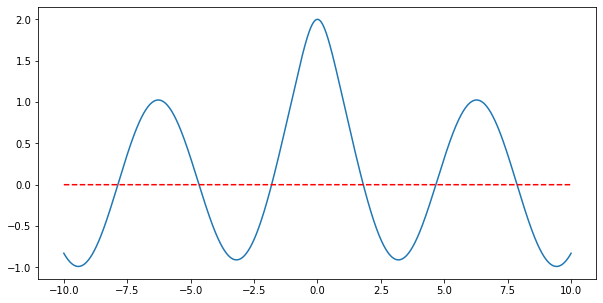

In [ ]:
plot(xx,f2(xx))
plot(xx, zeros(len(xx)), '--r')

[texto del vínculo](https://)<font size = 4  color = "black"> Método incremental

In [ ]:
print(incremental(f2,-2.5,0,1e-7))#una raíz está entre -2.5 y 0
print(incremental(f2,0,2.5,1e-7)) #la otra está entre 0 y 2.5 

[-1.8073753007058222, 6926246.0]
[1.8073754002215698, 18073753.0]


In [ ]:
# Consideremos el tiempo de cómputo del método incremental para la función 2


De manera análoga para cada método podemos analizar la precisión y el error

In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=-3
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f1,-3.5,-2.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-3.000,4.0,1.480297e-14,0.000011
1.000000e-02,-2.990,50.0,3.333333e-01,0.000019
1.000000e-03,-2.999,500.0,3.333333e-02,0.000172
1.000000e-04,-3.000,4999.0,3.517187e-11,0.002628
1.000000e-05,-3.000,49999.0,1.091867e-10,0.020605
1.000000e-06,-3.000,499999.0,2.329633e-09,0.182723
1.000000e-07,-3.000,5000000.0,3.306057e-06,1.744367


In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f2,1,2,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.900000,8.0,5.00000,0.000034
1.000000e-02,1.810000,80.0,9.50000,0.000063
1.000000e-03,1.808000,807.0,9.60000,0.004025
1.000000e-04,1.807400,8073.0,9.63000,0.004673
1.000000e-05,1.807380,80737.0,9.63100,0.031980
1.000000e-06,1.807376,807375.0,9.63120,0.311842
1.000000e-07,1.807375,8073753.0,9.63123,3.155694


Para la primera de las raíces aplicando el método de incremental se obtuvieron un error porcentual de 3.306057e-06 y el tiempo de cómputo fue de 	1.744367 s un tiempo considerable a comparación de otros incisos anteriores.
Análogamente se obtuvieron valores de 
9.63123	 en el error porcentual y el tiempo de cómputo de 3.155694. Se puede notar claramente un aumento exponencial en el error y en el tiempo de cómputo, consideraremos estos párametros para analizar cuál fue el mejor método para este polinomio.

<font size = 4  color = "black"> Método de bisección 

In [ ]:
print(biseccion(f2,-2.5,0,1e-4))
print(biseccion(f2,0,2.5,1e-4))

[-1.8073272705078125, 15]
[1.8073272705078125, 15]


Ahora continuamos para obtener el error porcentual y el tiempo de cómputo del método de la bisección para la función 2

In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f2,-2,-1,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)


,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807375,25,9.631234,0.000029
1.000000e-02,-1.807375,25,9.631234,0.000029
1.000000e-03,-1.807375,25,9.631234,0.000029
1.000000e-04,-1.807375,25,9.631234,0.000029
1.000000e-05,-1.807375,25,9.631234,0.000029
1.000000e-06,-1.807375,25,9.631234,0.000029
1.000000e-07,-1.807375,25,9.631234,0.000029


In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real= 2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f2,1,2,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.807375,24,9.631231,0.000019
1.000000e-02,1.807375,24,9.631231,0.000019
1.000000e-03,1.807375,24,9.631231,0.000019
1.000000e-04,1.807375,24,9.631231,0.000019
1.000000e-05,1.807375,24,9.631231,0.000019
1.000000e-06,1.807375,24,9.631231,0.000019
1.000000e-07,1.807375,24,9.631231,0.000019


Se obtuvo un error porcentual del mismo orden de magnitud que el método incremental para ambas raíces 9.631234	 y en este caso los tiempos de cómputo se mantuvieron constantes en un intervalo de (0.0000.19,0.000029) que son tiempos muy bajos a comparación del método incremental.

<font size = 4  color = "black"> Método de Newton-Raphson

In [206]:
print(newton(f2,df2,-1.8,1e-9)) #la primer raíz por la imagen está cerca de 0.6
print(newton(f2,df2,1.8,1e-9)) #y la segunda cerca de -2.8

[-1.8073753791824754, 3]
[1.8073753791824754, 3]


In [208]:
l_Newton = []
idx = []
t = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f2,df2,-1.8,epsilon= tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807365,1,9.631761,0.000059
1.000000e-02,-1.807365,1,9.631761,0.000007
1.000000e-03,-1.807375,2,9.631231,0.000044
1.000000e-04,-1.807375,2,9.631231,0.000014
1.000000e-05,-1.807375,3,9.631231,0.000021
1.000000e-06,-1.807375,3,9.631231,0.000019
1.000000e-07,-1.807375,3,9.631231,0.000020


In [209]:
l_Newton = []
idx = []
t = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f2,df2,1.8,epsilon= tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.807365,1,9.631761,0.000047
1.000000e-02,1.807365,1,9.631761,0.000006
1.000000e-03,1.807375,2,9.631231,0.000019
1.000000e-04,1.807375,2,9.631231,0.000014
1.000000e-05,1.807375,3,9.631231,0.000028
1.000000e-06,1.807375,3,9.631231,0.000029
1.000000e-07,1.807375,3,9.631231,0.000028


El error porcentual es idéntico al que obtuvimos por el método de la bisección  y los tiempos de carga son muy similares al método de la bisección pero menores a comparación del método incremental

<font size = 4  color = "black"> Método de la Secante

In [ ]:
print(secante(f2,-2,-1,delta=1e-9))
print(secante(f1,1,2,delta=1e-9))

[[-2, -0.2161468365471424, nan], [-1, 1.0403023058681398, 1], [-1.8279700870887288, -0.02401179594160885, -0.8279700870887288], [-1.8092904052700578, -0.0022411043062825486, 0.018679681818670968], [-1.8073674936756516, 9.231697948142159e-06, 0.0019229115944061625], [-1.80737538215941, -3.4851430075200085e-09, -7.888483758433651e-06], [-1.80737537918248, -5.412337245047638e-15, 2.976930035814007e-09]]
[[1, 4, nan], [2, 15, 1], [0.6363636363636365, 0.9917355371900838, -1.3636363636363635], [0.5398230088495575, 0.2819328060145665, -0.09654062751407899], [0.5014771856877119, 0.010344663969095613, -0.03834582316184554], [0.5000166114069643, 0.00011628040062738876, -0.0014605742807476396], [0.5000000070079041, 4.905532913213051e-08, -1.6604399060149433e-05], [0.5000000000000333, 2.3314683517128287e-13, -7.007870839181862e-09]]


In [ ]:
l_secante = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f2, -2, -1, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,-1.827970,8.601496,0.000023
1.000000e-02,-1.809290,9.535480,0.000007
1.000000e-03,-1.807367,9.631625,0.000006
1.000000e-04,-1.807367,9.631625,0.000005
1.000000e-05,-1.807367,9.631625,0.000005
1.000000e-06,-1.807375,9.631231,0.000006
1.000000e-07,-1.807375,9.631231,0.000005


<font size = 4  color = "white"> Método de Ridders

In [ ]:
l_secante = []
idx = []
valor_real=0.5
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f2, 1, 2, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,1.827970,265.594017,0.000026
1.000000e-02,1.806471,261.294180,0.000009
1.000000e-03,1.807379,261.475819,0.000007
1.000000e-04,1.807379,261.475819,0.000007
1.000000e-05,1.807379,261.475819,0.000006
1.000000e-06,1.807375,261.475076,0.000007
1.000000e-07,1.807375,261.475076,0.000007


Los tiempos de cómputo se siguen manteniendo en un intervalo donde no son representativos, el problema de este método fue que al momento de calcular la segunda raíz se obtuvo un error porcentual impredecibe y caótico. Por lo que esté método tiene la menor precisión hasta ahora de los 4 evaluados para la función 2.

<font size= 4 color='black'>Método de Ridders

In [ ]:
#Este es el código de Roxana y Jordi
print(ridders(f2,-2,-1, tol=1e-9))
print(ridders(f2,1, 2, tol=1e-9))

(-1.8073753791824754, 30)
(1.8073753791824754, 30)


In [ ]:
l_ridders = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,-2,-1, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807375,3,9.631230,0.000028
1.000000e-02,-1.807375,6,9.631231,0.000015
1.000000e-03,-1.807375,10,9.631231,0.000023
1.000000e-04,-1.807375,13,9.631231,0.000030
1.000000e-05,-1.807375,16,9.631231,0.000032
1.000000e-06,-1.807375,20,9.631231,0.000040
1.000000e-07,-1.807375,23,9.631231,0.000046


In [ ]:
l_ridders = []
idx = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,1,2, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.807375,3,9.631230,0.000019
1.000000e-02,1.807375,6,9.631231,0.000009
1.000000e-03,1.807375,10,9.631231,0.000013
1.000000e-04,1.807375,13,9.631231,0.000015
1.000000e-05,1.807375,16,9.631231,0.000018
1.000000e-06,1.807375,20,9.631231,0.000022
1.000000e-07,1.807375,23,9.631231,0.000026


De la misma manera que en los métodos de la bisección , de la secante y de Newton obtuvimos un error porcentual de menos del 10% y con tiempos de carga similares a los ya mencionados, entonces podemos aseverar que en general tres de los cuatro métodos tuvieron resultados casi idénticos, pero el que tuvo menores tiempos de carga fue el *método de Ridders y por esa pequeña diferencia lo consideramos como el más apropiado* para trabajar con funciones trigonométricas a las que se les reste un polinomio cúbico.

<font size=4 color='blue'> 3. Ahora se trabaja con la función $f(x)=(x-2)^2+(1+x^2)^{-1}$

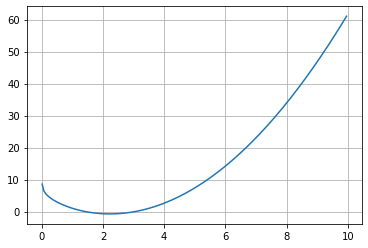

In [ ]:
a_3 = np.arange(0.01,10,0.05) #en 0 converge a infinito, se evita este punto
def f_3(x): #se llamará f_i de aquí en adelante, con i el número de problema
    return (x-2)**2-np.log(x)

plt.plot(a_3,f_3(a_3))
plt.grid(True)

<font size=4 color = 'blue'> Se acerca más al rango donde están las raíces.

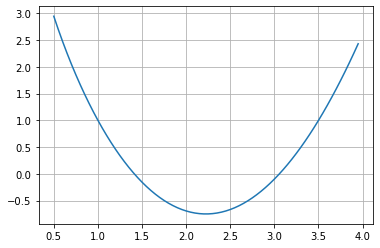

In [ ]:
b_3 = np.arange(0.5,4,0.05) #se amplifica la parte de las raíces
plt.plot(b_3,f_3(b_3))
plt.grid(True)

<font size = 4 color = 'blue'> Se comienza con el método incremental. Las raíces con 20 posiciones calculado con la función NSolve de Mathematica son $x=1.4123911720238845161$ y $x=3.0571035499947380778$

In [ ]:
print(incremental(f3,1.2,1.5,1e-7)) #la primer raíz está entre 1.2 y 1.5
print(incremental(f3,3,3.2,1e-7)) #la segunda está entre 3 y 3.2 a vista

[1.4123912001240082, 2123911.0]
[3.0571035999065455, 571035.0]


In [ ]:
lista_incremental = []
idx = []
valor_real=1.4123911720238845161
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f3,1.2,1.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.500000,2.0,6.202873,0.000012
1.000000e-02,1.420000,21.0,0.538720,0.000012
1.000000e-03,1.413000,212.0,0.043106,0.000092
1.000000e-04,1.412400,2123.0,0.000625,0.000781
1.000000e-05,1.412400,21239.0,0.000625,0.007677
1.000000e-06,1.412392,212391.0,0.000059,0.089911
1.000000e-07,1.412391,2123911.0,0.000002,0.768981


In [ ]:
lista_incremental = []
idx = []
valor_real=3.0571035499947380778
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f3,3,3.2,tol) #cada renglon de la tabla
    tfi = time() - ti
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,3.100000,0.0,1.403173,0.000011
1.000000e-02,3.060000,5.0,0.094745,0.000013
1.000000e-03,3.058000,57.0,0.029324,0.000028
1.000000e-04,3.057200,571.0,0.003155,0.000417
1.000000e-05,3.057110,5710.0,0.000211,0.002741
1.000000e-06,3.057104,57103.0,0.000015,0.022837
1.000000e-07,3.057104,571035.0,0.000002,0.211604


<font size = 4 color='blue'> El error para ambas raíces es de 2e-6. Sigue el método de disección.

In [ ]:
print(biseccion(f_3,1.2,1.5,1e-4))
print(biseccion(f_3,3,3.2,1e-4))

[1.4123291015625, 12]
[3.0571289062499996, 11]


In [ ]:
l_biseccion = []
idx = []
valor_real=1.4123911720238845161
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f3,1.2,1.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_biseccion.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.425000,2,0.892729,0.000044
1.000000e-02,1.415625,5,0.228961,0.000008
1.000000e-03,1.412695,9,0.021534,0.000012
1.000000e-04,1.412329,12,0.004395,0.000009
1.000000e-05,1.412393,15,0.000143,0.000011
1.000000e-06,1.412391,19,0.000021,0.000013
1.000000e-07,1.412391,22,0.000004,0.000015


In [ ]:
l_biseccion = []
idx = []
valor_real=3.0571035499947380778
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f3,3,3.2,tol) #cada renglon de la tabla
    tfi = time()-tfi
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_biseccion.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,3.050000,2,0.232362,1.607122e+09
1.000000e-02,3.056250,5,0.027920,2.956390e-05
1.000000e-03,3.057031,8,0.002365,1.607122e+09
1.000000e-04,3.057129,11,0.000829,4.506111e-05
1.000000e-05,3.057098,15,0.000169,1.607122e+09
1.000000e-06,3.057104,18,0.000006,6.890297e-05
1.000000e-07,3.057104,21,0.000003,1.607122e+09


<font size = 4 color = 'blue'> En este caso los errores porcentuales fueron de 4e-6 y 3e-6, un poco peor que el anterior método. Se sigue con el de Newton-Rapson

In [ ]:
df = lambda x: 2*(x-2)-1/x #se calcula a mano la derivada

print(newton(f_3,df,1.5,1e-9)) #la primer raíz por la imagen está cerca de 1.5
print(newton(f_3,df,3,1e-9)) #y la segunda cerca de 3

[1.4123911720238844, 4]
[3.0571035499947383, 4]


In [ ]:
l_Newton = []
idx = []
valor_real= 1.4123911720238845161
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f3,df3,1.5,epsilon= tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.406721,1,4.014636e-01,0.000015
1.000000e-02,1.412370,2,1.502047e-03,0.000004
1.000000e-03,1.412391,3,2.116122e-08,0.000004
1.000000e-04,1.412391,3,2.116122e-08,0.000004
1.000000e-05,1.412391,4,0.000000e+00,0.000005
1.000000e-06,1.412391,4,0.000000e+00,0.000005
1.000000e-07,1.412391,4,0.000000e+00,0.000005


In [ ]:
l_Newton = []
idx = []
valor_real=3.0571035499947380778
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f3,df3,3,epsilon = tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,3.059167,1,6.750910e-02,0.000012
1.000000e-02,3.057106,2,8.193039e-05,0.000004
1.000000e-03,3.057104,3,1.209764e-10,0.000003
1.000000e-04,3.057104,3,1.209764e-10,0.000002
1.000000e-05,3.057104,3,1.209764e-10,0.000002
1.000000e-06,3.057104,4,1.452647e-14,0.000003
1.000000e-07,3.057104,4,1.452647e-14,0.000003


<font size = 4 color = 'blue'> En este caso los errores fueron casi 0 y 1.452647e-14, errores muy pequeños. Se sigue con el método de la secante.

In [ ]:
print(secante(f_3,1.2,1.5,delta=1e-9))
print(secante(f_3,3,3.2,delta=1e-9))

[[1.2, 0.45767844320604556, nan], [1.5, -0.15546510810816438, 0.30000000000000004], [1.4239337471094946, -0.021570958281858954, -0.07606625289050539], [1.4116791268001907, 0.0013415839047646316, -0.01225462030930391], [1.4123966640002121, -1.0342654247208483e-05, 0.0007175372000214342], [1.4123911746198017, -4.888726756746564e-09, -5.489380410450551e-06], [1.412391172023875, 1.7708057242771247e-14, -2.59592658480301e-09]]
[[3, -0.09861228866810978, nan], [3.2, 0.2768491901943195, 0.20000000000000018], [3.0525285784133622, -0.00815388087962332, -0.14747142158663795], [3.0567477062993706, -0.0006357949005666441, 0.0042191278860084225], [3.0571045125399796, 1.7201656643539565e-06, 0.0003568062406089645], [3.057103549792781, -3.6091707400487394e-10, -9.627471984074987e-07]]


In [ ]:
l_secante = []
idx = []
valor_real=1.4123911720238845161
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f3, 1.2, 1.5, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,1.423934,8.172364e-01,0.000020
1.000000e-02,1.411679,5.041417e-02,0.000006
1.000000e-03,1.412397,3.888424e-04,0.000006
1.000000e-04,1.412397,3.888424e-04,0.000005
1.000000e-05,1.412391,1.837959e-07,0.000005
1.000000e-06,1.412391,1.837959e-07,0.000005
1.000000e-07,1.412391,1.837959e-07,0.000006


In [ ]:
l_secante = []
idx = []
valor_real=3.0571035499947380778
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f3, 3, 3.2, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,3.052529,1.496505e-01,0.000015
1.000000e-02,3.052529,1.496505e-01,0.000003
1.000000e-03,3.056748,1.163990e-02,0.000004
1.000000e-04,3.057105,3.148553e-05,0.000004
1.000000e-05,3.057105,3.148553e-05,0.000004
1.000000e-06,3.057104,6.606144e-09,0.000004
1.000000e-07,3.057104,6.606144e-09,0.000004


In [ ]:
print(ridders(f3,1.2,1.5, tol=1e-9))
print(ridders(f3,3,3.2, tol=1e-9))

(1.4123911720238846, 27)
(3.0571035499947388, 27)


In [ ]:
l_ridders = []
idx = []
valor_real= 1.4123911720238845161
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f3,1.2,1.5, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.412556,1,1.167981e-02,0.000021
1.000000e-02,1.412391,4,3.144237e-14,0.000009
1.000000e-03,1.412391,7,0.000000e+00,0.000012
1.000000e-04,1.412391,11,1.572118e-14,0.000018
1.000000e-05,1.412391,14,1.572118e-14,0.000023
1.000000e-06,1.412391,17,1.572118e-14,0.000025
1.000000e-07,1.412391,21,1.572118e-14,0.000041


In [ ]:
l_ridders = []
idx = []
valor_real= 3.0571035499947380778
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f3,3,3.2, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,3.057044,1,1.963956e-03,0.000016
1.000000e-02,3.057104,4,0.000000e+00,0.000008
1.000000e-03,3.057104,7,2.905294e-14,0.000009
1.000000e-04,3.057104,10,2.905294e-14,0.000011
1.000000e-05,3.057104,14,2.905294e-14,0.000015
1.000000e-06,3.057104,17,0.000000e+00,0.000026
1.000000e-07,3.057104,20,2.905294e-14,0.000020


<font size = 4 color = 'blue'> Los errores entonces son de 1.5727118e-14 y 2.90529e-14. Por ello los mejores métodos fueron Newton y Ridders, ambos tienen los errores porcentuales más pequeños, casi cero del órden de 1e-14, además ambos tienen tiempo de cómputo del órden de 1e-6, el cuál es un buen tiempo. El peor método por otro lado fue bisección y lo sigue de cerca incremental aunque debido al tiempo de computo enorme del incremental de 0.2 y 0.7 s, este puede determinarse cómo el peor, el máximo error del de la bisección fue de 1.5e-5. 

4.$f(x)=x^3-3x+2$

(-0.05, 0.05)

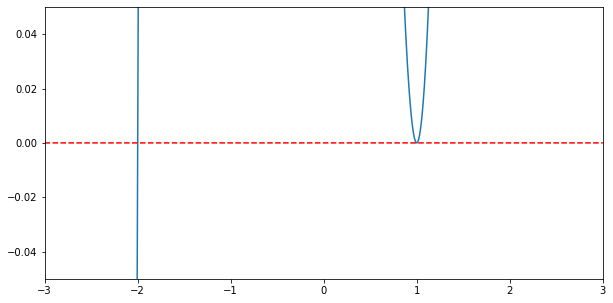

In [ ]:
plot(xx,f4(xx))
plot(xx, zeros(len(xx)), '--r')
xlim(-3,3) 
ylim(-0.05,.05)

<font size = 4  color = "black"> Método incremental

In [ ]:
print(incremental(f4,-2.3,-2,1e-9))#una raíz está entre -2.3 y -2
print(incremental(f4,.5,1.5,1e-9)) #la otra está entre .5 y 1.5 

[-1.9999999991778905, 299999975.0]
[0.9999999918590341, 500000005.0]


In [ ]:
# Consideremos el tiempo de cómputo del método incremental para la función 2


De manera análoga para cada método podemos analizar la precisión y el error

In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f4,-2.3,-2,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-2.000,2.0,2.220446e-14,0.000013
1.000000e-02,-1.990,30.0,5.000000e-01,0.000362
1.000000e-03,-1.999,300.0,5.000000e-02,0.000199
1.000000e-04,-2.000,2999.0,3.165246e-11,0.001907
1.000000e-05,-2.000,29999.0,9.827694e-11,0.014745
1.000000e-06,-2.000,299999.0,2.096667e-09,0.124826
1.000000e-07,-2.000,3000000.0,4.975451e-06,1.187647


In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=1
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f4,.5,1.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.0,4.0,1.110223e-14,0.000011
1.000000e-02,1.0,49.0,4.440892e-14,0.000030
1.000000e-03,1.0,499.0,4.440892e-14,0.000409
1.000000e-04,1.0,4999.0,5.506706e-12,0.001850
1.000000e-05,1.0,49999.0,2.275513e-10,0.021551
1.000000e-06,1.0,499999.0,1.437783e-09,0.196965
1.000000e-07,1.0,4999999.0,2.631779e-08,1.822611


<font size = 4  color = "black"> Método de bisección 

In [ ]:
print(biseccion(f2,-2.3,-2,1e-4))
print(biseccion(f2,0.5,1.5,1e-4))

[-2.0000732421875, 12]
[1.49993896484375, 14]


Ahora continuamos para obtener el error porcentual del método de la bisección para la función 2

In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f4,-2.3,-2,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)


,Raiz,Pasos,error %,Tiempo
1.000000e-01,-2.0,22,0.000004,0.000017
1.000000e-02,-2.0,22,0.000004,0.000017
1.000000e-03,-2.0,22,0.000004,0.000017
1.000000e-04,-2.0,22,0.000004,0.000017
1.000000e-05,-2.0,22,0.000004,0.000017
1.000000e-06,-2.0,22,0.000004,0.000017
1.000000e-07,-2.0,22,0.000004,0.000017


In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real= 1
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f2,.5,1.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.5,24,49.999994,0.000018
1.000000e-02,1.5,24,49.999994,0.000018
1.000000e-03,1.5,24,49.999994,0.000018
1.000000e-04,1.5,24,49.999994,0.000018
1.000000e-05,1.5,24,49.999994,0.000018
1.000000e-06,1.5,24,49.999994,0.000018
1.000000e-07,1.5,24,49.999994,0.000018


<font size = 4  color = "black"> Método de Newton-Raphson

In [210]:
print(newton(f4,df4,-2,1e-9)) #la primer raíz por la imagen está cerca -2
print(newton(f4,df4,1,1e-9)) #y la segunda cerca de 1

[-2.0, 1]


ZeroDivisionError: ignored

En este caso no podemos evaluar el desempeño del método numérico de Newton ya que la derivada se anula , solo se puede considerar una raíz ya que al acercarse al cero se indetermina el método por división entre cero 

In [ ]:

l_Newton = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f4,df4,-2,epsilon = tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-2.0,1,0.0,0.000039
1.000000e-02,-2.0,1,0.0,0.000003
1.000000e-03,-2.0,1,0.0,0.000002
1.000000e-04,-2.0,1,0.0,0.000002
1.000000e-05,-2.0,1,0.0,0.000002
1.000000e-06,-2.0,1,0.0,0.000002
1.000000e-07,-2.0,1,0.0,0.000002


<font size = 4  color = "black"> Método de la Secante

In [ ]:
print(secante(f2,-2,-1,delta=1e-9))
print(secante(f1,1,2,delta=1e-9))

[[-2, -0.2161468365471424, nan], [-1, 1.0403023058681398, 1], [-1.8279700870887288, -0.02401179594160885, -0.8279700870887288], [-1.8092904052700578, -0.0022411043062825486, 0.018679681818670968], [-1.8073674936756516, 9.231697948142159e-06, 0.0019229115944061625], [-1.80737538215941, -3.4851430075200085e-09, -7.888483758433651e-06], [-1.80737537918248, -5.412337245047638e-15, 2.976930035814007e-09]]
[[1, 4, nan], [2, 15, 1], [0.6363636363636365, 0.9917355371900838, -1.3636363636363635], [0.5398230088495575, 0.2819328060145665, -0.09654062751407899], [0.5014771856877119, 0.010344663969095613, -0.03834582316184554], [0.5000166114069643, 0.00011628040062738876, -0.0014605742807476396], [0.5000000070079041, 4.905532913213051e-08, -1.6604399060149433e-05], [0.5000000000000333, 2.3314683517128287e-13, -7.007870839181862e-09]]


In [ ]:
l_secante = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f2, -2, -1, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,-1.827970,8.601496,0.000023
1.000000e-02,-1.809290,9.535480,0.000007
1.000000e-03,-1.807367,9.631625,0.000006
1.000000e-04,-1.807367,9.631625,0.000005
1.000000e-05,-1.807367,9.631625,0.000005
1.000000e-06,-1.807375,9.631231,0.000006
1.000000e-07,-1.807375,9.631231,0.000005


<font size = 4  color = "white"> Método de Ridders

In [ ]:
l_secante = []
idx = []
valor_real=0.5
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f2, 1, 2, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,1.827970,265.594017,0.000026
1.000000e-02,1.806471,261.294180,0.000009
1.000000e-03,1.807379,261.475819,0.000007
1.000000e-04,1.807379,261.475819,0.000007
1.000000e-05,1.807379,261.475819,0.000006
1.000000e-06,1.807375,261.475076,0.000007
1.000000e-07,1.807375,261.475076,0.000007


<font size= 4 color='black'>Método de Ridders

In [ ]:
#Este es el código de Roxana y Jordi
print(ridders(f2,-2,-1, tol=1e-9))
print(ridders(f2,1, 2, tol=1e-9))

(-1.8073753791824754, 30)
(1.8073753791824754, 30)


In [ ]:
l_ridders = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,-2,-1, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807375,3,9.631230,0.000028
1.000000e-02,-1.807375,6,9.631231,0.000015
1.000000e-03,-1.807375,10,9.631231,0.000023
1.000000e-04,-1.807375,13,9.631231,0.000030
1.000000e-05,-1.807375,16,9.631231,0.000032
1.000000e-06,-1.807375,20,9.631231,0.000040
1.000000e-07,-1.807375,23,9.631231,0.000046


In [ ]:
l_ridders = []
idx = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,1,2, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.807375,3,9.631230,0.000019
1.000000e-02,1.807375,6,9.631231,0.000009
1.000000e-03,1.807375,10,9.631231,0.000013
1.000000e-04,1.807375,13,9.631231,0.000015
1.000000e-05,1.807375,16,9.631231,0.000018
1.000000e-06,1.807375,20,9.631231,0.000022
1.000000e-07,1.807375,23,9.631231,0.000026


Los métodos que mejor desempeño tuvieron fueron el de Ridders, el de Newton y el de la bisección. Para calcular la primera raíz. Pero el más consistente fue el de Ridders debido a que en ambas raíces mantuvo un error porcentual debajo del 10% mientras que en los otros el error porcentual explotaba hasta el 261%.En el método de la bisección se obtuvo un error porcentual de 0% pero con tiempos de carga mayores a los de Ridders. 

<font size = 4 color = 'red'> 5. Vamos con la función $x^{1/3}$. Aquí la raiz es $x=0$. Se grafica primero.

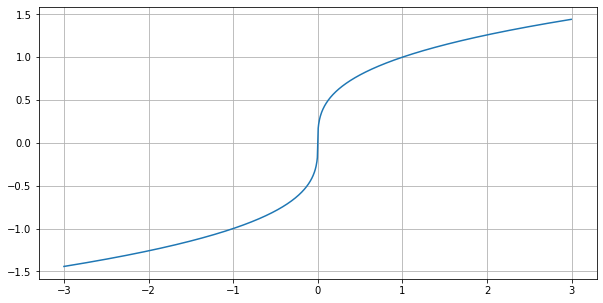

In [ ]:
a_5 = np.arange(-3,3,0.005)
def f_5(x): #se llamará f_i de aquí en adelante, con i el número de problema
    return np.sign(x) * (np.abs(x)) ** (1/3) #por alguna razón numpy no calcula bien la potenciación de negativos
                                             #con esto se soluciona

plt.plot(a_5,f_5(a_5))
plt.grid(True)

<font size = 4 color = 'red'> Se comienza con el incremental.

In [ ]:
print(incremental(f_5,-0.2,0.2,1e-7)) #la raíz esté entre -0.2 y 0.2 por la imagen

[4.721179148182479e-12, 1999999.0]


In [ ]:
lista_incremental = []
idx = []
valor_real=0
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f_5,-0.2,0.2,tol) #cada renglon de la tabla
    tfi = time()-ti
    error=(abs(valor_real-raiz[0]))*100
    lista_incremental.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.000000e+00,1.0,0.000000e+00,0.000056
1.000000e-02,3.122502e-17,19.0,3.122502e-15,0.000057
1.000000e-03,1.595946e-16,199.0,1.595946e-14,0.000557
1.000000e-04,1.000000e-04,2000.0,1.000000e-02,0.005921
1.000000e-05,5.921888e-14,19999.0,5.921888e-12,0.062575
1.000000e-06,1.793523e-13,199999.0,1.793523e-11,0.513969
1.000000e-07,4.721179e-12,1999999.0,4.721179e-10,5.061095


<font size = 4 color = 'red'> El error porcentual fue de 4.7211e-10. Se sigue con el método de bisección

In [ ]:
print(biseccion(f_5,-0.2,0.2,1e-7))
print(biseccion(f_5,-0.2,0.2,1e-7))

[0.19999990463256836, 22]
[0.19999990463256836, 22]


In [ ]:
l_biseccion = []
idx = []
valor_real=0
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f_5,-0.2,0.2,tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0]))*100
    l_biseccion.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.100000,2,10.000000,0.000119
1.000000e-02,0.193750,6,19.375000,0.000052
1.000000e-03,0.199219,9,19.921875,0.000133
1.000000e-04,0.199902,12,19.990234,0.000129
1.000000e-05,0.199994,16,19.999390,0.000179
1.000000e-06,0.199999,19,19.999924,0.000874
1.000000e-07,0.200000,22,19.999990,0.000304


<font size = 4 color = 'red'> Aquí incluso el error se incrementa enormemente al mejorar el paso. El error porcentual fue de 19.99. Se sigue con Newton

In [ ]:
df_5 = lambda x: 1/3 * np.sign(x) * np.abs(x) ** (-2/3) #se calcula a mano la derivada

print(newton(f_5,df_5,0.2,1e-9)) #la raíz está cerca de 0.2

[-inf, 515]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


<font size = 4 color = 'red'> Debido a que la derivada diverge en $x=0$ que es la raíz, no se puede aplicar el método. Se sigue con la secante.

In [ ]:
print(secante(f_5,-0.2,0.2,delta=1e-9))

[[-0.2, -0.5848035476425733, nan], [0.2, 0.5848035476425733, 0.4], [0.0, 0.0, -0.2]]


In [ ]:
l_secante = []
idx = []
valor_real=0
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f_5, -0.2, 0.2, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time() - ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real))*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,0.0,0.0,0.000096
1.000000e-02,0.0,0.0,0.000016
1.000000e-03,0.0,0.0,0.000014
1.000000e-04,0.0,0.0,0.000014
1.000000e-05,0.0,0.0,0.000014
1.000000e-06,0.0,0.0,0.000014
1.000000e-07,0.0,0.0,0.000014


<font size = 4 color = 'red' > Converge muy bien. El error es justamente 0. Falta Ridders.

In [ ]:
print(ridders(f_5,-0.2,0.2, tol=1e-9))

(0.0, 1)


In [ ]:
l_ridders = []
idx = []
valor_real= 0
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f_5,-0.2,0.2, tol) #cada renglon de la tabla
    tfi = time() -ti
    error=abs(abs(valor_real-raiz[0]))*100
    l_ridders.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.0,1,0.0,0.000121
1.000000e-02,0.0,1,0.0,0.000017
1.000000e-03,0.0,1,0.0,0.000015
1.000000e-04,0.0,1,0.0,0.000015
1.000000e-05,0.0,1,0.0,0.000015
1.000000e-06,0.0,1,0.0,0.000015
1.000000e-07,0.0,1,0.0,0.000016


<font size = 4 color = 'red' > También el error fue 0. Por ello es el mejor método junto con el de la secante, el tiempo de computo en ambos además es del órden de 1e-5. Fueron los únicos buenos métodos, el peor fue Newton ya que nisiquiera pudo calcular la raíz, la bisección e incremental tampoco fueron buenos, tuvieron errores porcentuales cercanos al 20%, y el incremental con un terrible tiempo de computo de 5s.

In [ ]:
plot(xx,f(xx))
xlim(-1,1)
ylim(-10,10)

<font size = 4 color = 'orange'> 7. Se sigue con la función $x-\cos(x)$, en el dominio $x \in (0,\pi/2)$. Mathematica arroja la raíz 0.73908513321516064166 

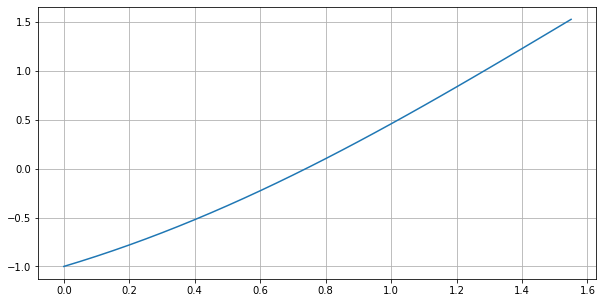

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
valor7 = 0.73908513321516064166
a = np.arange(0,np.pi/2,0.05)

plt.plot(a,f7(a))
plt.grid(True)

In [ ]:
print(incremental(f7,0.6,0.8,1e-7)) #la primer raíz está entre 0.6 y 0.8

[0.7390851999267917, 1390851.0]


In [ ]:
from time import time

lista_incremental = []
idx = []
valor_real= valor7
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f7,0.6,0.8,tol) #cada renglon de la tabla
    tfi = time() - ti
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.800000,1.0,8.241928,0.000050
1.000000e-02,0.740000,13.0,0.123784,0.000025
1.000000e-03,0.740000,139.0,0.123784,0.000205
1.000000e-04,0.739100,1390.0,0.002012,0.001983
1.000000e-05,0.739090,13908.0,0.000658,0.026470
1.000000e-06,0.739086,139085.0,0.000117,0.205005
1.000000e-07,0.739085,1390851.0,0.000009,2.024467


In [ ]:
print(biseccion(f7,0.6,0.8,1e-7))

[0.7390851020812989, 21]


In [ ]:
l_biseccion = []
idx = []
valor_real=valor7
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f_5,0.6,0.8,tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0]))*100
    l_biseccion.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.750000,2,1.091487,0.000086
1.000000e-02,0.793750,5,5.466487,0.000047
1.000000e-03,0.799219,8,6.013362,0.000073
1.000000e-04,0.799902,11,6.081721,0.000122
1.000000e-05,0.799994,15,6.090876,0.000126
1.000000e-06,0.799999,18,6.091410,0.000141
1.000000e-07,0.800000,21,6.091477,0.000175


In [ ]:
print(newton(f7,df7,0.6,epsilon=1e-7)) #la raíz está cerca de 0.6

[0.7390851332151607, 4]


In [ ]:
from time import time

l_Newton = []
idx = []
valor_real=valor7
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f7,df7,0.6,epsilon = tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.739090,2,7.230116e-04,0.000074
1.000000e-02,0.739090,2,7.230116e-04,0.000010
1.000000e-03,0.739085,3,8.530758e-10,0.000013
1.000000e-04,0.739085,3,8.530758e-10,0.000012
1.000000e-05,0.739085,3,8.530758e-10,0.000038
1.000000e-06,0.739085,4,0.000000e+00,0.000029
1.000000e-07,0.739085,4,0.000000e+00,0.000022


In [ ]:
print(secante(f7,0.6,0.8,delta=1e-9))

[[0.6, -0.22533561490967835, nan], [0.8, 0.10329329065283466, 0.20000000000000007], [0.7371368197353012, -0.003259317290635555, -0.06286318026469884], [0.7390597295010554, -4.2515723026825825e-05, 0.001922909765754155], [0.739085144155111, 1.8309232463487035e-08, 2.5414654055588848e-05], [0.7390851332150993, -1.0269562977782698e-13, -1.0940011674342998e-08]]


In [ ]:
l_secante = []
idx = []
valor_real=valor7
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f7, 0.6, 0.8, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time() - ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real))*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,0.737137,0.194831,0.000048
1.000000e-02,0.737137,0.194831,0.000012
1.000000e-03,0.739060,0.002540,0.000014
1.000000e-04,0.739060,0.002540,0.000012
1.000000e-05,0.739085,0.000001,0.000016
1.000000e-06,0.739085,0.000001,0.000016
1.000000e-07,0.739085,0.000001,0.000015


In [ ]:
print(ridders(f7,0.6,0.8, tol=1e-9))

(0.7390851332151606, 27)


In [ ]:
l_ridders = []
idx = []
valor_real= valor7
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f7,0.6,0.8, tol) #cada renglon de la tabla
    tfi = time() - ti
    error=abs(abs(valor_real-raiz[0]))*100
    l_ridders.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.739115,1,3.028491e-03,0.000094
1.000000e-02,0.739085,3,3.674838e-12,0.000030
1.000000e-03,0.739085,7,1.110223e-14,0.000063
1.000000e-04,0.739085,10,1.110223e-14,0.000076
1.000000e-05,0.739085,13,1.110223e-14,0.000097
1.000000e-06,0.739085,17,1.110223e-14,0.000124
1.000000e-07,0.739085,20,1.110223e-14,0.000175


<font size = 4 color = 'orange' > Cómo se puede ver por los errores, el peor método es el de la bisección, pues tiene un error porcentual de 6%, mientras que un tiempo de computo de 1.75e-4 s, lo cuál es bueno, pues el incremental tiene un tiempo de 2 s aunque un error del órden de 1e-6. El mejor método fue el de Newton ya que reporta un error de 0%, su tiempo fue del órden de 2.2e-6, menor en este caso que el resto de métodos. 

<font size = 4 color='black'> 8.$f(x) = \cos(x)-x^3$

In [ ]:
xx = linspace(-10,10,10000) 
rcParams[ 'figure.figsize' ] = (10,5)

(-10.0, 10.0)

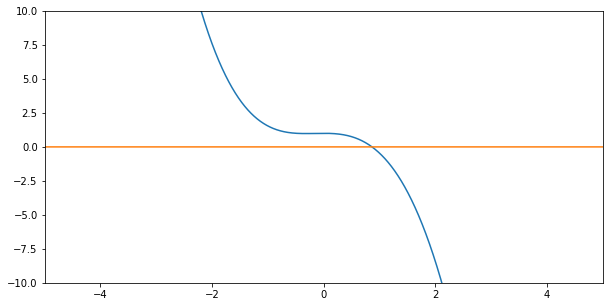

In [ ]:
plot(xx,f8(xx))
plot(xx,zeros(len(xx)))
xlim(-5,5)
ylim(-10,10)

<font size = 4  color = "black"> Método incremental

In [ ]:
print(incremental(f8,1.5,2.5,1e-7))#una raíz está entre 1.5 y 2.5

nada


In [ ]:
# Consideremos el tiempo de cómputo del método incremental para la función 2


Ya que no se obtuvo ningún resultado no es posible evaluar el error porcentual y el tiempo de cómputo de el método incremental

<font size = 4  color = "black"> Método de bisección 

In [ ]:
print(biseccion(f8,1.5,2.5,1e-9))

[2.4999999990686774, 30]


Ahora continuamos para obtener el error porcentual del método de la bisección para la función 2

In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real=-2.5
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f8,1.5,2.5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)


,Raiz,Pasos,error %,Tiempo
1.000000e-01,2.5,24,199.999998,0.000083
1.000000e-02,2.5,24,199.999998,0.000083
1.000000e-03,2.5,24,199.999998,0.000083
1.000000e-04,2.5,24,199.999998,0.000083
1.000000e-05,2.5,24,199.999998,0.000083
1.000000e-06,2.5,24,199.999998,0.000083
1.000000e-07,2.5,24,199.999998,0.000083


<font size = 4  color = "black"> Método de Newton-Raphson

In [ ]:
print(newton(f8,df8,2.5,1e-9)) #la primer raíz por la imagen está cerca de 2.5

[0.8654740331016144, 7]


In [ ]:
l_Newton = []
idx = []
t = []
valor_real=0.86 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f8,df8,.9,epsilon= tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.866580,1,0.765093,0.000057
1.000000e-02,0.865475,2,0.636653,0.000257
1.000000e-03,0.865474,3,0.636515,0.000019
1.000000e-04,0.865474,3,0.636515,0.000015
1.000000e-05,0.865474,3,0.636515,0.000015
1.000000e-06,0.865474,4,0.636515,0.000020
1.000000e-07,0.865474,4,0.636515,0.000020


<font size = 4  color = "black"> Método de la Secante

In [ ]:
print(secante(f8,1.5,2.5,delta=1e-9))


[[1.5, -3.304262798332297, nan], [2.5, -16.426143615546934, 1.0], [1.2481868000205103, -1.6275954059848545, -1.2518131999794897], [1.1105080639319713, -0.9253034292371543, -0.13767873608853898], [0.9291097127423079, -0.20350176504572193, -0.1813983511896634], [0.87796701458182, -0.0380431437331169, -0.05114269816048789], [0.8662080080000902, -0.002209765492564797, -0.011759006581729792], [0.865482855970139, -2.654416751979305e-05, -0.0007251520299512704], [0.8654740393848759, -1.8903434373385153e-08, -8.816585263082821e-06], [0.8654740331016683, -1.6187051699034782e-13, -6.2832076208607646e-09]]


In [ ]:
l_secante = []
idx = []
valor_real=.86
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f2, 1.5, 2.5, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,1.863301,116.662895,0.000062
1.000000e-02,1.807522,110.176993,0.000030
1.000000e-03,1.807522,110.176993,0.000021
1.000000e-04,1.807376,110.159971,0.000026
1.000000e-05,1.807376,110.159971,0.000025
1.000000e-06,1.807376,110.159971,0.000055
1.000000e-07,1.807375,110.159928,0.000033


<font size= 4 color='black'>Método de Ridders

In [ ]:
#Este es el código de Roxana y Jordi
print(ridders(f8,1.5,2.5, tol=1e-9))


(nan, 26)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


In [ ]:
No es posible evaluar el método de Ridders para este problema 

En este caso los métodos que tuvieron mejor desempeño fueron los de Newton y de la secante ya que ambos nos dan la raíz de .86 y con errores porcentuales muy bajos, además el tiempo de cómputo fue muy eficiente. Los peores métodos fueron los de Ridders y el Incremental ya que no se obtuvo nada consistente.

<font size = 4 color = 'indigo'> 9. Ahora se sigue con la función $\tan(\pi x) -6 =0$ en el intervalo $x \in (0,1)$, Mathematica arroja una raíz de $x=0.44743154328874657005$

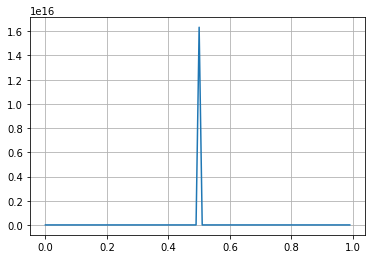

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

valor9 = 0.44743154328874657005
b = np.arange(0,1,0.01)
plt.plot(b,f9(b))
plt.grid(True)

In [ ]:
print(incremental(f9,0.4,0.6,1e-7)) #la raíz está entre 0.4 y 0.6

[0.44743160000136395, 474315.0]


In [ ]:
from time import time

lista_incremental = []
idx = []
valor_real= valor9
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f9,0.4,0.6,tol) #cada renglon de la tabla
    tfi = time() - ti
    error=(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.500000,0.0,11.748938,0.000174
1.000000e-02,0.450000,4.0,0.574045,0.000032
1.000000e-03,0.448000,47.0,0.127049,0.000216
1.000000e-04,0.447500,474.0,0.015300,0.001109
1.000000e-05,0.447440,4743.0,0.001890,0.010813
1.000000e-06,0.447432,47431.0,0.000102,0.088843
1.000000e-07,0.447432,474315.0,0.000013,0.846291


In [ ]:
print(biseccion(f9,0.4,0.6,1e-7))

[0.44743146896362307, 21]


In [ ]:
l_biseccion = []
idx = []
valor_real=9
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f9,0.4,0.6,tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0]))*100
    l_biseccion.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.500000,1,850.000000,0.000148
1.000000e-02,0.443750,5,855.625000,0.000106
1.000000e-03,0.447656,8,855.234375,0.000104
1.000000e-04,0.447363,11,855.263672,0.000132
1.000000e-05,0.447430,15,855.256958,0.000118
1.000000e-06,0.447431,18,855.256882,0.000130
1.000000e-07,0.447431,21,855.256853,0.000118


In [213]:
print(newton(f9,df9,0.4,epsilon=1e-7)) #la raíz está cerca de 0.6

[0.44743154328874873, 8]


In [214]:
from time import time

l_Newton = []
idx = []
t= []
valor_real=9
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f9,df9,0.4,epsilon = tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.488826,1,94.568595,0.000060
1.000000e-02,0.480014,2,94.666507,0.000030
1.000000e-03,0.447432,7,95.028538,0.000060
1.000000e-04,0.447432,7,95.028538,0.000077
1.000000e-05,0.447432,8,95.028538,0.000086
1.000000e-06,0.447432,8,95.028538,0.000063
1.000000e-07,0.447432,8,95.028538,0.000065


In [212]:
print(secante(f9,0.41,0.5,delta=1e-7))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


KeyboardInterrupt: ignored

In [211]:
l_secante = []
idx = []
valor_real=9
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f9, 0.4, 0.6, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time() - ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real))*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in tan


KeyboardInterrupt: ignored

In [ ]:
print(ridders(f9,0.4,0.6, tol=1e-9))

(0.5000000007448876, 28)


In [ ]:
from time import time

l_ridders = []
idx = []
valor_real= valor9
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f9,0.4,0.6, tol) #cada renglon de la tabla
    tfi = time() - ti
    error=abs(abs(valor_real-raiz[0]))*100
    l_ridders.append([raiz[0],raiz[1],error,tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,0.600000,1,15.256846,0.000148
1.000000e-02,0.506250,5,5.881846,0.000134
1.000000e-03,0.500781,8,5.334971,0.000132
1.000000e-04,0.500098,11,5.266611,0.000160
1.000000e-05,0.500006,15,5.257456,0.000196
1.000000e-06,0.500001,18,5.256922,0.000202
1.000000e-07,0.500000,21,5.256855,0.000225


<font size = 4 color = 'indigo'> Cómo se puede observar, el método de Newton es el mejor ya que el tiempo de corrida es el menor que es del órden de 7e-5 y aún más el error es del órden de 1e-13. Por otro lado el método de la secante es el peor porque nisiquiera pudo calcular la raíz al encontrar valores inválidos en la tangente. 

<font size=4 color='black'>10. $f(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}$

In [ ]:
xx = linspace(-10,10,10000) 
rcParams[ 'figure.figsize' ] = (10,5)

(0.0, 2.5)

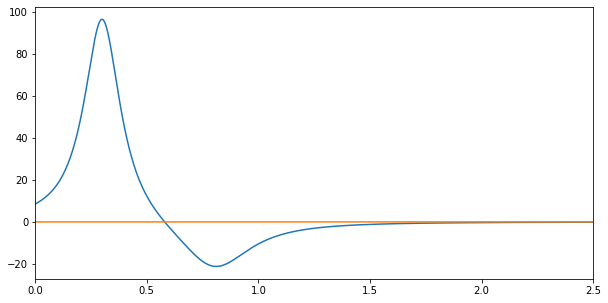

In [ ]:
plot (xx,f10(xx))
plot(xx,zeros(len(xx)))
xlim(0,2.5)

[texto del vínculo](https://)<font size = 4  color = "black"> Método incremental

In [ ]:
print(incremental(f2,.5,1,1e-9))#una raíz está entre -2.5 y 0


nada


El método incremental no nos devolvió nada pero podemos evaluar el tiempo de cómputo 

In [ ]:
ti = time() 
incremental(f2,.5,1,1e-9)
tfi= time()-ti 
print(incremental(f2,.5,1,1e-9),tfi)


<font size = 4  color = "black"> Método de bisección 

In [ ]:
print(biseccion(f10,.5,1,1e-9))


[0.5799999991431832, 29]


Ahora continuamos para obtener el error porcentual del método de la bisección para la función 2

In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f10,0.5,1,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)


,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807375,25,9.631234,0.000029
1.000000e-02,-1.807375,25,9.631234,0.000029
1.000000e-03,-1.807375,25,9.631234,0.000029
1.000000e-04,-1.807375,25,9.631234,0.000029
1.000000e-05,-1.807375,25,9.631234,0.000029
1.000000e-06,-1.807375,25,9.631234,0.000029
1.000000e-07,-1.807375,25,9.631234,0.000029


<font size = 4  color = "black"> Método de Newton-Raphson

In [215]:
print(newton(f10,df10,0.6,1e-9)) #la primer raíz por la imagen está cerca de 0.6


TypeError: ignored

In [ ]:
l_Newton = []
idx = []
t = []
valor_real=0.5 
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=newton(f1,df1,0.6,epsilon= tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_Newton.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_Newton, index=idx, columns=cols)

No fue posible aplicar el método de Newton.

<font size = 4  color = "black"> Método de la Secante

In [216]:
print(secante(f2,-2,-1,delta=1e-9))
print(secante(f1,1,2,delta=1e-9))

[[-2, -0.2161468365471424, nan], [-1, 1.0403023058681398, 1], [-1.8279700870887288, -0.02401179594160885, -0.8279700870887288], [-1.8092904052700578, -0.0022411043062825486, 0.018679681818670968], [-1.8073674936756516, 9.231697948142159e-06, 0.0019229115944061625], [-1.80737538215941, -3.4851430075200085e-09, -7.888483758433651e-06], [-1.80737537918248, -5.412337245047638e-15, 2.976930035814007e-09]]
[[1, 4, nan], [2, 15, 1], [0.6363636363636365, 0.9917355371900838, -1.3636363636363635], [0.5398230088495575, 0.2819328060145665, -0.09654062751407899], [0.5014771856877119, 0.010344663969095613, -0.03834582316184554], [0.5000166114069643, 0.00011628040062738876, -0.0014605742807476396], [0.5000000070079041, 4.905532913213051e-08, -1.6604399060149433e-05], [0.5000000000000333, 2.3314683517128287e-13, -7.007870839181862e-09]]


In [217]:
l_secante = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f10, -2, -1, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,-2.278794,13.939719,0.000016
1.000000e-02,-4.154301,107.715066,0.000007
1.000000e-03,-9.926007,396.300331,0.000009
1.000000e-04,-22.699995,1034.999770,0.000011
1.000000e-05,-51.068032,2453.401624,0.000013
1.000000e-06,-114.067265,5603.363231,0.000019
1.000000e-07,-253.972968,12598.648378,0.000019


<font size = 4  color = "white"> Método de Ridders

In [ ]:
l_secante = []
idx = []
valor_real=0.5
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f2, 1, 2, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

,Raiz,error %,Tiempo
1.000000e-01,1.827970,265.594017,0.000026
1.000000e-02,1.806471,261.294180,0.000009
1.000000e-03,1.807379,261.475819,0.000007
1.000000e-04,1.807379,261.475819,0.000007
1.000000e-05,1.807379,261.475819,0.000006
1.000000e-06,1.807375,261.475076,0.000007
1.000000e-07,1.807375,261.475076,0.000007


<font size= 4 color='black'>Método de Ridders

In [ ]:
#Este es el código de Roxana y Jordi
print(ridders(f2,-2,-1, tol=1e-9))
print(ridders(f2,1, 2, tol=1e-9))

(-1.8073753791824754, 30)
(1.8073753791824754, 30)


In [ ]:
l_ridders = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,-2,-1, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807375,3,9.631230,0.000028
1.000000e-02,-1.807375,6,9.631231,0.000015
1.000000e-03,-1.807375,10,9.631231,0.000023
1.000000e-04,-1.807375,13,9.631231,0.000030
1.000000e-05,-1.807375,16,9.631231,0.000032
1.000000e-06,-1.807375,20,9.631231,0.000040
1.000000e-07,-1.807375,23,9.631231,0.000046


In [ ]:
l_ridders = []
idx = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,1,2, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.807375,3,9.631230,0.000019
1.000000e-02,1.807375,6,9.631231,0.000009
1.000000e-03,1.807375,10,9.631231,0.000013
1.000000e-04,1.807375,13,9.631231,0.000015
1.000000e-05,1.807375,16,9.631231,0.000018
1.000000e-06,1.807375,20,9.631231,0.000022
1.000000e-07,1.807375,23,9.631231,0.000026


El mejor método fue el de Ridders ya que mantuvo un error porcentual debajo del 10% y con tiempos de carga muy eficientes. 
Con los métodos de Newton e Incremental no fue posible determinar las raíces y el peor fue el método de la secante ya que dio un error porcentual de 12 mil %. 

<font size=4 color='black'> 11.$f(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752$

(-10.0, 10.0)

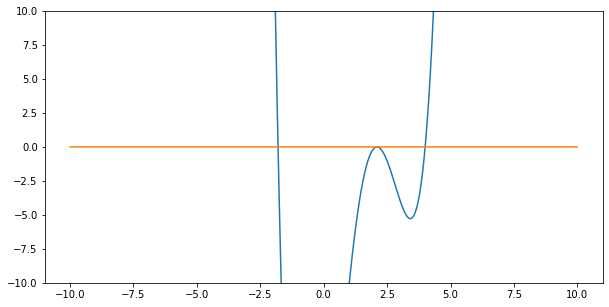

In [ ]:
plot(xx,f11(xx))
plot(xx,zeros(len(xx)))
#xlim(-1,1)
ylim(-10,10)

<font size = 4  color = "black"> Método incremental

In [ ]:
print(incremental(f11,-2.5,-1,1e-9))#una raíz está entre -2.5 y -1
print(incremental(f11,0,1.5,1e-9)) #la otra está entre 0 y 1.5
print(incremental(f11,3,5,1e-9)) #la otra está entre 3 y 5


[-1.799999999081745, 699999942.0]
nada
[4.000000000740364, 999999917.0]


In [ ]:
# Consideremos el tiempo de cómputo del método incremental para la función 2


De manera análoga para cada método podemos analizar la precisión y el error

In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f11,-2.5,-1,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.800,6.0,10.000000,0.000019
1.000000e-02,-1.790,70.0,10.500000,0.000055
1.000000e-03,-1.799,700.0,10.050000,0.000490
1.000000e-04,-1.800,6999.0,10.000000,0.020605
1.000000e-05,-1.800,69999.0,10.000000,0.051152
1.000000e-06,-1.800,699999.0,10.000000,0.445875
1.000000e-07,-1.800,7000000.0,10.000005,4.259435


In [ ]:
lista_incremental = []
idx = []
t = []
valor_real=4
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=incremental(f11,3,5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    lista_incremental.append([raiz[0],raiz[1],error, t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(lista_incremental, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,4.100,10.0,2.500000e+00,0.000031
1.000000e-02,4.010,100.0,2.500000e-01,0.000112
1.000000e-03,4.001,1000.0,2.500000e-02,0.000935
1.000000e-04,4.000,9999.0,5.275780e-11,0.006960
1.000000e-05,4.000,99999.0,1.637801e-10,0.070527
1.000000e-06,4.000,999999.0,3.494449e-09,0.597821
1.000000e-07,4.000,10000000.0,2.459086e-06,5.883286


<font size = 4  color = "black"> Método de bisección 

In [ ]:
print(biseccion(f11,-2.5,-1,1e-9))
print(biseccion(f11,0,1.6,1e-9))
print(biseccion(f11,3,5,1e-9))

[-1.8000000005122274, 31]
[1.599999999254942, 31]
[4.000000000931323, 31]


Ahora continuamos para obtener el error porcentual del método de la bisección para la función 2

In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f11,-2.5,-1,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)


,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.8,24,9.999998,0.000041
1.000000e-02,-1.8,24,9.999998,0.000041
1.000000e-03,-1.8,24,9.999998,0.000041
1.000000e-04,-1.8,24,9.999998,0.000041
1.000000e-05,-1.8,24,9.999998,0.000041
1.000000e-06,-1.8,24,9.999998,0.000041
1.000000e-07,-1.8,24,9.999998,0.000041


In [218]:
  l_biseccion = []
idx = []
t= []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f11,0,1.6,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.6,24,20.000005,0.000028
1.000000e-02,1.6,24,20.000005,0.000028
1.000000e-03,1.6,24,20.000005,0.000028
1.000000e-04,1.6,24,20.000005,0.000028
1.000000e-05,1.6,24,20.000005,0.000028
1.000000e-06,1.6,24,20.000005,0.000028
1.000000e-07,1.6,24,20.000005,0.000028


In [ ]:
  l_biseccion = []
idx = []
t= []
valor_real= 4
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=biseccion(f11,3,5,tol) #cada renglon de la tabla
    tfi = time()-ti
    t.append(tfi)
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
  l_biseccion.append([raiz[0],raiz[1],error,t[i-1]])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_biseccion, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,4.0,25,0.000001,0.000034
1.000000e-02,4.0,25,0.000001,0.000034
1.000000e-03,4.0,25,0.000001,0.000034
1.000000e-04,4.0,25,0.000001,0.000034
1.000000e-05,4.0,25,0.000001,0.000034
1.000000e-06,4.0,25,0.000001,0.000034
1.000000e-07,4.0,25,0.000001,0.000034


<font size = 4  color = "black"> Método de Newton-Raphson

In [ ]:
print(newton(f11,df11,-2,1e-9)) #la primer raíz por la imagen está cerca de -2
print(newton(f11,df11,4,1e-9)) #y la segunda cerca de 4

TypeError: ignored

<font size = 4  color = "black"> Método de la Secante

In [ ]:
print(secante(f11,-2.5,-1,delta=1e-9))
print(secante(f11,3,5,delta=1e-9))

[[-2.5, 96.278, nan], [-1, -38.44, 1.5], [-1.4280051663474813, -25.132493885001466, -0.4280051663474813], [-2.2363337241569248, 51.167420626441725, -0.8083285578094435], [-1.6942611990874796, -8.66814594880137, 0.5420725250694451], [-1.7727891387574175, -2.356002166345494, -0.07852793966993787], [-1.8020996238093026, 0.1854912281079102, -0.02931048505188505], [-1.7999603942206763, -0.0034938478182731103, 0.0021392295886262236], [-1.7999999430717926, -5.022092405937428e-06, -3.954885111623341e-05], [-1.800000000001545, 1.3630696571453882e-10, -5.6929752467738126e-08]]
[[3, -3.8880000000000017, nan], [5, 57.188, 2], [3.1273167856441155, -4.538118957045807, -1.8726832143558845], [3.2649969012775615, -5.052634631301903, 0.13768011563344595], [1.912953892486838, -0.27111213030301684, -1.3520430087907236], [1.8362931091698131, -0.5471422698847128, -0.07666078331702475], [1.988248816103776, -0.09517371619065784, 0.15195570693396276], [2.0202470363495886, -0.04810565257247745, 0.03199822024581

In [ ]:
l_secante = []
idx = []
time = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f11, -2.5, -1, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

TypeError: ignored

<font size = 4  color = "white"> Método de Ridders

In [ ]:
l_secante = []
idx = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=secante(f11, 3, 5, delta=tol)[-1] #nos quedamos con el último valor que nos da la raíz y el error
    tfi = time()-ti
    l_secante.append([raiz[0],abs(abs(raiz[0]-valor_real)/valor_real)*100,tfi])
cols = ["Raiz","error %","Tiempo"]
pd.DataFrame(l_secante, index=idx, columns=cols)

TypeError: ignored

Fue posible determinar las raíces con el método de la secante pero no podemos comparar su desempeño ya que al intentar usar pandas obtenemos un error en donde no se pueden incluir los párametros en una lista.

<font size= 4 color='black'>Método de Ridders

In [ ]:
#Este es el código de Roxana y Jordi
print(ridders(f11,-2.5,-1, tol=1e-9))
print(ridders(f11,0, 1.5, tol=1e-9))
print(ridders(f11,3, 5, tol=1e-9))


(-1.7999999999999996, 27)
(1.5142089535075574, 31)
(4.000000000000001, 31)


In [ ]:
l_ridders = []
idx = []
valor_real=-2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,-2,-1, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,-1.807375,3,9.631230,0.000028
1.000000e-02,-1.807375,6,9.631231,0.000015
1.000000e-03,-1.807375,10,9.631231,0.000023
1.000000e-04,-1.807375,13,9.631231,0.000030
1.000000e-05,-1.807375,16,9.631231,0.000032
1.000000e-06,-1.807375,20,9.631231,0.000040
1.000000e-07,-1.807375,23,9.631231,0.000046


In [ ]:
l_ridders = []
idx = []
valor_real=2
for i in range(1,8):
    tol = 10**(-i)
    idx.append(tol)
    ti = time()
    raiz=ridders(f2,1,2, tol) #cada renglon de la tabla
    tfi = time()-ti
    error=abs(abs(valor_real-raiz[0])/valor_real)*100
    l_ridders.append([raiz[0],raiz[1],error, tfi])
cols = ["Raiz","Pasos","error %","Tiempo"]
pd.DataFrame(l_ridders, index=idx, columns=cols)

,Raiz,Pasos,error %,Tiempo
1.000000e-01,1.807375,3,9.631230,0.000019
1.000000e-02,1.807375,6,9.631231,0.000009
1.000000e-03,1.807375,10,9.631231,0.000013
1.000000e-04,1.807375,13,9.631231,0.000015
1.000000e-05,1.807375,16,9.631231,0.000018
1.000000e-06,1.807375,20,9.631231,0.000022
1.000000e-07,1.807375,23,9.631231,0.000026


El método de Ridders y el de la bisección fueron los más apropiados y consistentes ya que mantienen errores porcentuales debajo del 10% y con tiempos de cómputo rápidos a comparación del incremental .
Con los métodos de Newton y de la secante no obtuvimos ningún párametro o resultado que nos permita discutir el desempeño de los mismos a comparación del método de Ridders y de la bisección. 
Por lo que a nuestro criterio cualquiera de estos dos es muy eficiente al momento de trabajar con polinomios decimales y fraccionales.
